In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SHIBUSDT_1h_1h-pump05_210510_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2021-05-10 11:00:00,0.000014,0.000050,0.000014,0.000030,1.527431e+13,730457.0,7.922164e+12,2.613939e+08,0,...,NaN,1.077531,1.207674,0.518659,NaN,NaN,NaN,0.037319,NaN,0.344828
1,2021-05-10 12:00:00,0.000030,0.000039,0.000029,0.000033,1.290046e+13,613245.0,6.863991e+12,2.366849e+08,0,...,NaN,1.137087,0.312350,0.532073,NaN,NaN,NaN,0.064147,NaN,0.344828
2,2021-05-10 13:00:00,0.000033,0.000036,0.000029,0.000031,8.472225e+12,424398.0,4.128436e+12,1.335645e+08,0,...,NaN,0.950423,0.224199,0.487291,NaN,NaN,NaN,-0.025419,NaN,0.344828
3,2021-05-10 14:00:00,0.000031,0.000031,0.000028,0.000029,5.786327e+12,302869.0,2.894601e+12,8.471910e+07,0,...,NaN,1.000994,0.117467,0.500248,NaN,NaN,NaN,0.000497,NaN,0.344828
4,2021-05-10 15:00:00,0.000029,0.000031,0.000029,0.000029,3.593920e+12,205869.0,1.906123e+12,5.701797e+07,0,...,NaN,1.129356,0.074315,0.530374,NaN,NaN,NaN,0.060749,NaN,0.344828


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SHIBUSDT"
start_date = "2021-05-10"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close        volume  num_trades  \
 0      0.000014  0.000050  0.000014  0.000030  1.527431e+13    730457.0   
 1      0.000030  0.000039  0.000029  0.000033  1.290046e+13    613245.0   
 2      0.000033  0.000036  0.000029  0.000031  8.472225e+12    424398.0   
 3      0.000031  0.000031  0.000028  0.000029  5.786327e+12    302869.0   
 4      0.000029  0.000031  0.000029  0.000029  3.593920e+12    205869.0   
 ...         ...       ...       ...       ...           ...         ...   
 32665  0.000019  0.000019  0.000019  0.000019  6.074974e+10     44645.0   
 32666  0.000019  0.000019  0.000019  0.000019  8.477922e+10     65727.0   
 32667  0.000019  0.000019  0.000019  0.000019  4.508749e+10     32728.0   
 32668  0.000019  0.000019  0.000019  0.000019  2.384620e+10     18897.0   
 32669  0.000019  0.000019  0.000019  0.000019  3.828225e+10     27409.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0        7.

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.8628


np.float64(0.8627681757123651)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.8628
AUC-ROC Score: 0.9552

Overall Metrics:
Accuracy:  0.8086
Precision: 0.8528
Recall:    0.8086
F1-Score:  0.8036

Class 0 Metrics:
Precision: 0.7227
Recall:    0.9829
F1-Score:  0.8329

Class 1 Metrics:
Precision: 0.9755
Recall:    0.6442
F1-Score:  0.7760

Using raw probabilities
Classification threshold: 0.8628
{'accuracy': 0.8085991678224688, 'precision': 0.8527815009498945, 'recall': 0.8085991678224688, 'f1': 0.8036224512693164, 'auc_roc': np.float64(0.9551867539468618), 'optimal_threshold': np.float64(0.8627681757123651), 'precision_0': 0.7226890756302521, 'recall_0': 0.9828571428571429, 'f1_0': 0.8329297820823245, 'precision_1': 0.9755102040816327, 'recall_1': 0.6442048517520216, 'f1_1': 0.775974025974026}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')



📉 Bottom 20 features by SHAP importance:
Bottom 20 features explain 1.16% of total SHAP value magnitude
Top 20 features explain 93.99% of total SHAP value magnitude
Ratio (Top/Bottom): 80.69x


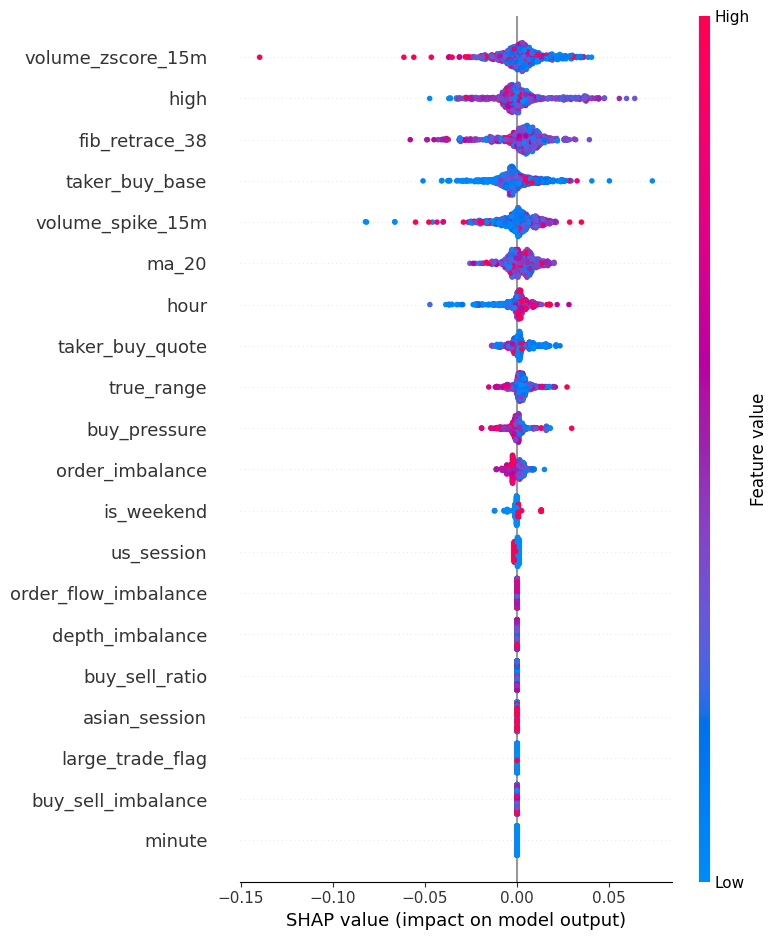

In [5]:
manager.plot_shap_analysis(show_bottom=True, n_features=20)


📈 Plotting feature importance...

📉 Bottom 20 features contribution:
Bottom 20 features explain 3.40% of total importance
Top 20 features explain 83.14% of total importance
Ratio (Top/Bottom): 24.48x


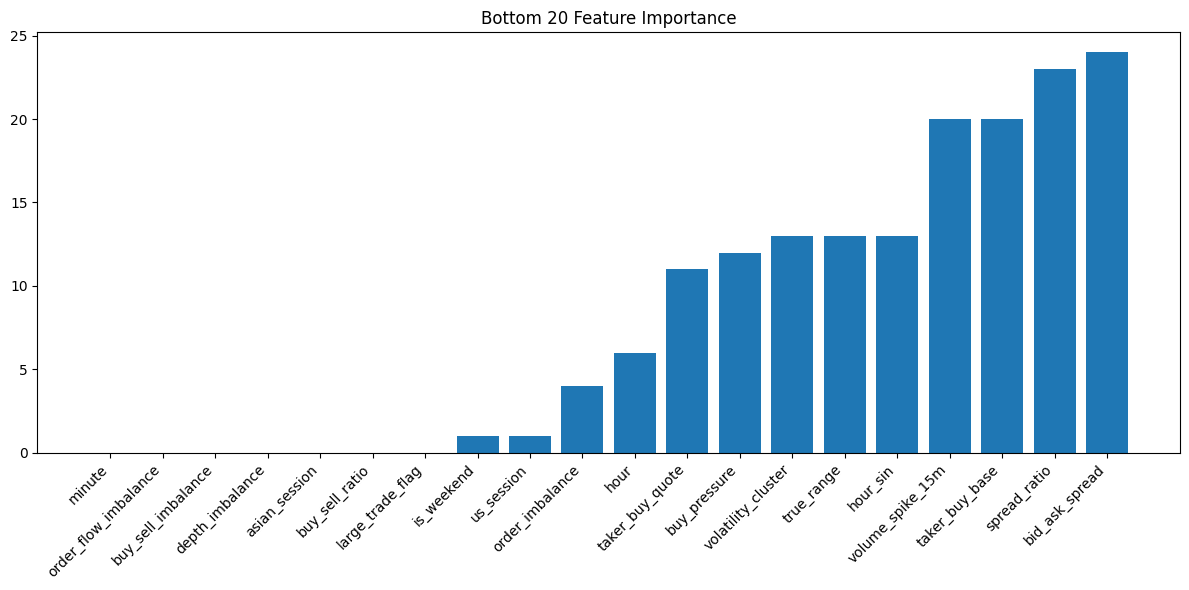

In [6]:
manager.plot_feature_importance(show_bottom=True, n_features=20)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()